In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer #
from sklearn.pipeline import Pipeline #
import numpy as np

from sklearn.metrics import mean_absolute_percentage_error
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Loading dataset
data = pd.read_csv("SDN.csv")


In [ ]:
data.head

<bound method NDFrame.head of          vds  L(um)  W(um)  drain_length(um)  temperature  vgs  vsb       vth  \
0      -0.45   8.00   0.84               0.3         27.0  0.0  0.0  0.402306   
1      -0.40   8.00   0.84               0.3         27.0  0.0  0.0  0.420865   
2      -0.35   8.00   0.84               0.3         27.0  0.0  0.0  0.438375   
3      -0.30   8.00   0.84               0.3         27.0  0.0  0.0  0.454991   
4      -0.25   8.00   0.84               0.3         27.0  0.0  0.0  0.470835   
...      ...    ...    ...               ...          ...  ...  ...       ...   
871483  2.30   0.15   7.00               0.3         27.0  1.8  1.5  0.746876   
871484  2.35   0.15   7.00               0.3         27.0  1.8  1.5  0.744368   
871485  2.40   0.15   7.00               0.3         27.0  1.8  1.5  0.741860   
871486  2.45   0.15   7.00               0.3         27.0  1.8  1.5  0.739353   
871487  2.50   0.15   7.00               0.3         27.0  1.8  1.5  0.736847  

In [ ]:
# Preprocessing
continuous_features = ['vds', 'L(um)', 'W(um)', 'drain_length(um)', 'temperature', 'vgs', 'vsb']
categorical_feature = 'corner'
target_feature = 'id(uA)'

# Scale continuous features
scaler = StandardScaler()
data[continuous_features] = scaler.fit_transform(data[continuous_features])

# Encode categorical feature 'corner'
encoder = LabelEncoder()
data[categorical_feature] = encoder.fit_transform(data[categorical_feature])


In [ ]:
selected_columns = ['vds', 'L(um)', 'W(um)', 'drain_length(um)', 'temperature', 'vgs', 'vsb', 'corner', 'id(uA)']
data = data[selected_columns]

In [ ]:
# Split data into features and target
x = data.drop(columns=['id(uA)'])  # Features
y = data['id(uA)']  # Target



In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
x

,vds,L(um),W(um),drain_length(um),temperature,vgs,vsb,corner
0,-1.647390,17.760404,-0.422640,-4.996004e-16,0.0,-1.672512,-1.451274,4
1,-1.590589,17.760404,-0.422640,-4.996004e-16,0.0,-1.672512,-1.451274,4
2,-1.533787,17.760404,-0.422640,-4.996004e-16,0.0,-1.672512,-1.451274,4
3,-1.476986,17.760404,-0.422640,-4.996004e-16,0.0,-1.672512,-1.451274,4
4,-1.420185,17.760404,-0.422640,-4.996004e-16,0.0,-1.672512,-1.451274,4
...,...,...,...,...,...,...,...,...
871483,1.476673,-0.415676,0.499147,-4.996004e-16,0.0,1.688541,1.467349,0
871484,1.533475,-0.415676,0.499147,-4.996004e-16,0.0,1.688541,1.467349,0
871485,1.590276,-0.415676,0.499147,-4.996004e-16,0.0,1.688541,1.467349,0
871486,1.647077,-0.415676,0.499147,-4.996004e-16,0.0,1.688541,1.467349,0


In [ ]:
y

0            0.034866
1            0.009451
2            0.002331
3            0.000532
4            0.000111
             ...     
871483    4289.588350
871484    4326.932100
871485    4364.240650
871486    4401.516730
871487    4438.762770
Name: id(uA), Length: 871488, dtype: float64

In [ ]:
data.isna().sum()


vds                 0
L(um)               0
W(um)               0
drain_length(um)    0
temperature         0
vgs                 0
vsb                 0
corner              0
id(uA)              0
dtype: int64

In [ ]:
data=data.drop_duplicates() #remove all duplicates
data.info() #show the dataset informationdataset.isna().sum()
df = pd.DataFrame(data)

# Drop rows with any missing or NaN values
data = df.dropna(how='any')



<class 'pandas.core.frame.DataFrame'>
Int64Index: 871488 entries, 0 to 871487
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   vds               871488 non-null  float64
 1   L(um)             871488 non-null  float64
 2   W(um)             871488 non-null  float64
 3   drain_length(um)  871488 non-null  float64
 4   temperature       871488 non-null  float64
 5   vgs               871488 non-null  float64
 6   vsb               871488 non-null  float64
 7   corner            871488 non-null  int64  
 8   id(uA)            871488 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 66.5 MB


In [ ]:
data

,vds,L(um),W(um),drain_length(um),temperature,vgs,vsb,corner,id(uA)
0,-1.647390,17.760404,-0.422640,-4.996004e-16,0.0,-1.672512,-1.451274,4,0.034866
1,-1.590589,17.760404,-0.422640,-4.996004e-16,0.0,-1.672512,-1.451274,4,0.009451
2,-1.533787,17.760404,-0.422640,-4.996004e-16,0.0,-1.672512,-1.451274,4,0.002331
3,-1.476986,17.760404,-0.422640,-4.996004e-16,0.0,-1.672512,-1.451274,4,0.000532
4,-1.420185,17.760404,-0.422640,-4.996004e-16,0.0,-1.672512,-1.451274,4,0.000111
...,...,...,...,...,...,...,...,...,...
871483,1.476673,-0.415676,0.499147,-4.996004e-16,0.0,1.688541,1.467349,0,4289.588350
871484,1.533475,-0.415676,0.499147,-4.996004e-16,0.0,1.688541,1.467349,0,4326.932100
871485,1.590276,-0.415676,0.499147,-4.996004e-16,0.0,1.688541,1.467349,0,4364.240650
871486,1.647077,-0.415676,0.499147,-4.996004e-16,0.0,1.688541,1.467349,0,4401.516730


In [ ]:
data['corner']  #corner after encoding

0         4
1         4
2         4
3         4
4         4
         ..
871483    0
871484    0
871485    0
871486    0
871487    0
Name: corner, Length: 871488, dtype: int64

In [ ]:
# Build the neural network model using TensorFlow's Keras API
input_layer = layers.Input(shape=(X_train.shape[1],))
x = layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))(input_layer)
x = layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))(x)
output_layer = layers.Dense(1, activation='linear')(x)
model = keras.Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100, batch_size=32, verbose=2,
    callbacks=[early_stopping]
)


Epoch 1/100
19064/19064 - 46s - loss: 307563.1250 - val_loss: 175891.1406 - 46s/epoch - 2ms/step
Epoch 2/100
19064/19064 - 43s - loss: 163858.0781 - val_loss: 142829.0156 - 43s/epoch - 2ms/step
Epoch 3/100
19064/19064 - 39s - loss: 138896.3438 - val_loss: 123233.0312 - 39s/epoch - 2ms/step
Epoch 4/100
19064/19064 - 45s - loss: 118969.8984 - val_loss: 104195.3125 - 45s/epoch - 2ms/step
Epoch 5/100
19064/19064 - 36s - loss: 99937.3203 - val_loss: 91569.3438 - 36s/epoch - 2ms/step
Epoch 6/100
19064/19064 - 38s - loss: 83452.8359 - val_loss: 72830.9766 - 38s/epoch - 2ms/step
Epoch 7/100
19064/19064 - 41s - loss: 71025.4062 - val_loss: 62368.4141 - 41s/epoch - 2ms/step
Epoch 8/100
19064/19064 - 41s - loss: 62005.7891 - val_loss: 57270.1211 - 41s/epoch - 2ms/step
Epoch 9/100
19064/19064 - 36s - loss: 55812.3320 - val_loss: 51331.6055 - 36s/epoch - 2ms/step
Epoch 10/100
19064/19064 - 37s - loss: 51795.5000 - val_loss: 48945.9570 - 37s/epoch - 2ms/step
Epoch 11/100
19064/19064 - 36s - loss: 49

In [ ]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE) on test set: {mape * 100:.2f}%")

4086/4086 [==============================] - 7s 2ms/step
Mean Absolute Percentage Error (MAPE) on test set: 160410691587257568.00%


4086/4086 [==============================] - 7s 2ms/step
Mean Absolute Percentage Error (MAPE) on test set: 160410691587257568.00%


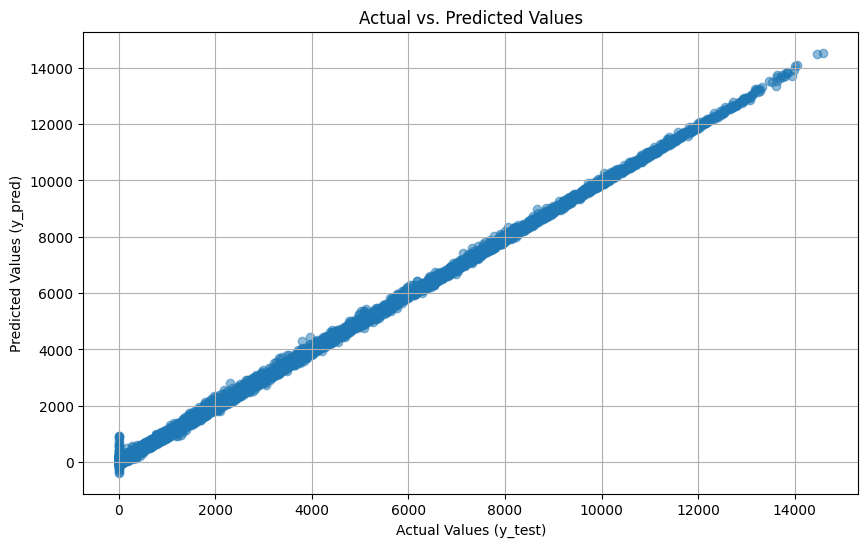

In [ ]:

# Evaluate the model on the test set
y_pred = model.predict(X_test)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE) on test set: {mape * 100:.2f}%")

# Create a performance plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")
plt.grid(True)
plt.show()


Text(0.5, 1.0, 'Loss Curve')

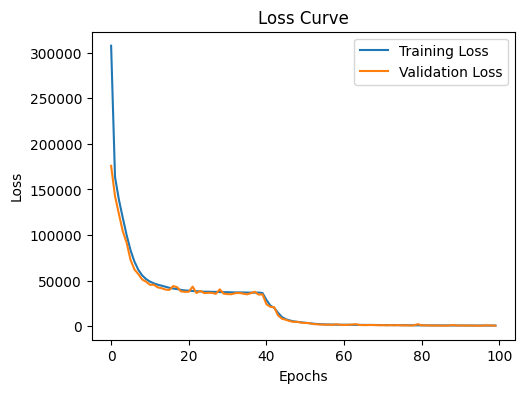

In [ ]:

# Loss Curve Plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')


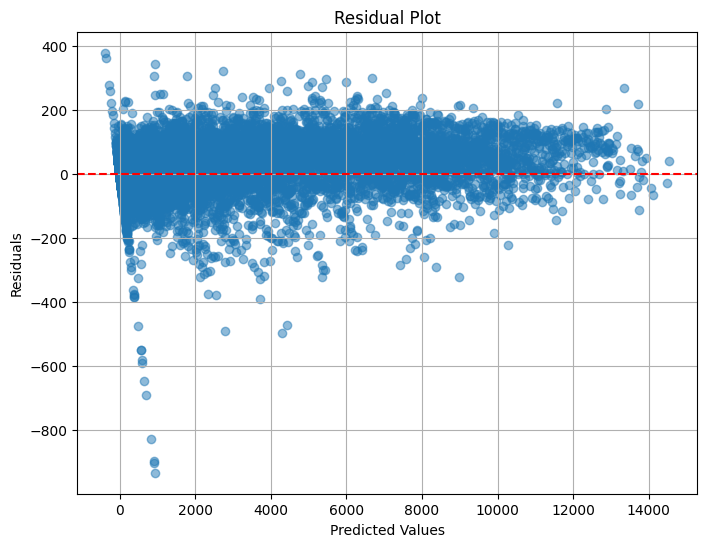

In [ ]:
# Residual Plot
residuals = y_test - y_pred.flatten()
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

In [ ]:

# Evaluate the model on the test set
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


4086/4086 [==============================] - 7s 2ms/step
Mean Absolute Error (MAE): 11.31
Mean Squared Error (MSE): 684.53
Mean Absolute Percentage Error (MAPE): 160410691587257568.00%


In [ ]:
# Assume 'raw_data' is a dictionary or DataFrame containing the raw input data
raw_data = {
    'vds': -0.45,
    'L(um)':8,
    'W(um)': 0.84,
    'drain_length(um)': 0.3,
    'temperature': 27,
    'vgs': 0,
    'vsb': 0,
    'corner': 'tt'
}

# Create a DataFrame with the raw data (assuming it's a dictionary)
raw_df = pd.DataFrame([raw_data])

# Preprocess the raw data (similar to the preprocessing used for training data)
raw_df[continuous_features] = scaler.transform(raw_df[continuous_features])
raw_df['corner'] = encoder.transform(raw_df['corner'])

# Predict using the preprocessed data
predictions = model.predict(raw_df)

# Extract the predicted 'id(uA)' value (assuming 'predictions' is a NumPy array)
predicted_id = predictions[0][0]

print(f"Predicted id(uA): {predicted_id:.2f}")


1/1 [==============================] - 0s 26ms/step
Predicted id(uA): 0.84
